In [1]:
import pandas as pd
from data import load_database_train
from plotter import plot_all_readings
import matplotlib.pyplot as plt
from preprocessing import interpolate_reading
%matplotlib inline

database_train = load_database_train()

print(database_train.__dict__.keys())

dict_keys(['datalist', 'datadict', 'X', 'y', 'cv_author', 'label_encoder', 'ones_encoder', 'y_encoded'])


datalist = lista de objetos do tipo data,

datadict = lista dos objetos tipo data que foram convertidos para dicionario

X = np.array(datalist)

y = np.array de labels do X 

In [2]:
df = pd.DataFrame(data=database_train.datadict)
pd.set_option('display.max_rows', None)
df

,spell,author,device,date,acc_data,gyr_data,time
0,ALOHOMORA,ANDERSON,SAMSUNG_A5,2020-07-27 10:04:23.717944,252,252,1271.355746
1,INCENDIO,YURI,SAMSUNG_NOTE_10,2020-07-26 21:27:30.895970,1593,1593,3183.623543
2,ALOHOMORA,HEITOR,MOTO_X,2020-07-27 09:27:20.636773,467,467,2257.385254
3,INCENDIO,GUILHERME,SAMSUNG_S8,2020-07-27 21:13:23.326184,1819,1819,3638.455442
4,FINITE_INCANTATEM,ANDERSON,SAMSUNG_A5,2020-07-27 10:05:44.270674,247,247,1247.520790
5,FINITE_INCANTATEM,DIEGO,MOTO_G5S_PLUS,2020-07-27 21:15:36.605755,296,296,1429.016113
6,FINITE_INCANTATEM,ANDERSON,SAMSUNG_A5,2020-07-27 10:05:51.438983,317,317,1592.590631
7,INCENDIO,HEITOR,MOTO_X,2020-07-27 09:31:55.488731,303,303,1462.951660
8,FINITE_INCANTATEM,HEITOR,MOTO_X,2020-07-27 09:30:45.198846,310,310,1496.856690
9,FINITE_INCANTATEM,GUILHERME,SAMSUNG_S8,2020-07-27 21:10:52.197677,1787,1787,3574.447557


ValueError: Can only tuple-index with a MultiIndex

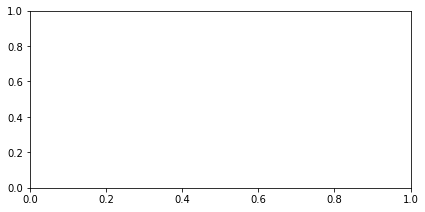

In [15]:
readings = df['readings'][0]
plot_all_readings(readings,  table_format=(4, 2))

#### Grafico dos dados interpolados

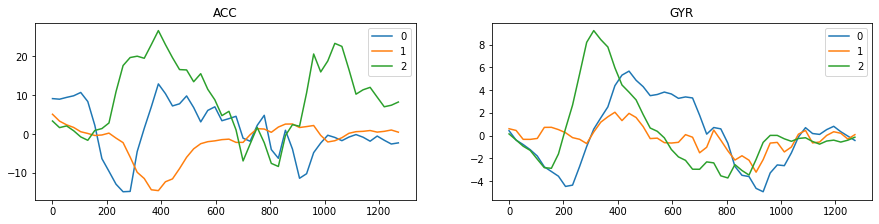

In [16]:
interpolated = interpolate_reading(database_train.datalist[0])
plot_all_readings(interpolated,  table_format=(4, 2))

# Aprendizado de com funções facilitadas para o problema

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from cross_validation import cv_folds_author
from data import load_database_train
from preprocessing import InterpolateRawData
from train import grid_search

database_train = load_database_train()

pipe = Pipeline([
    ('interpolate', InterpolateRawData(num_samples=10)),
    ('logistic', LogisticRegression(random_state=0, max_iter=100000, solver='saga'))
])

print(pipe.get_params().keys())

parameters = {'logistic__penalty': ('l1', 'l2'), 
              'logistic__C': [0.5, 10], 
              'logistic__multi_class': ['ovr', 'multinomial']}
grid_search(pipe, parameters,
            database_train.X,
            database_train.y,
            cv=database_train.cv,
            n_jobs=6)

In [ ]:
# Aprendizado de máquina com scikit-learn direto

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

datalist = database_train.datalist
for i, data in enumerate(datalist):
    interpolated = interpolate_reading(data)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

clf = LogisticRegression(random_state=0, max_iter=100000)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

datalist = database_train.datalist
for i, data in enumerate(datalist):
    interpolated = interpolate_reading(data)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

clf =  KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = []
y = []

datalist = database_train.datalist
for i, data in enumerate(datalist):
    interpolated = interpolate_reading(data)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['spell'])], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['spell'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = []
y = []

datalist = database_train.datalist
for i, data in enumerate(datalist):
    interpolated = interpolate_reading(data)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['spell'])], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['spell'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

# Aprendizado de máquina com scikit-learn direto

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

X = []
y = []


datalist = database_train.datalist
for i, data in enumerate(datalist):
    X.append(data.readings['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

clf = LogisticRegression(random_state=0).fit(X, y)

clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

datalist = database_train.datalist
for i, data in enumerate(datalist):
    interpolated = interpolate_reading(data)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

clf = LogisticRegression(random_state=0).fit(X, y)

clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

datalist = database_train.datalist
for i, data in enumerate(datalist):
    interpolated = interpolate_reading(data)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

clf = LogisticRegression(random_state=0, max_iter=100000)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = []
y = []

datalist = database_train.datalist
for i, data in enumerate(datalist):
    interpolated = interpolate_reading(data)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

clf =  KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = []
y = []

datalist = database_train.datalist
for i, data in enumerate(datalist):
    interpolated = interpolate_reading(data)
    X.append(interpolated['ACC'][1:].reshape(-1))
    y.append(data.spell.value)
    
X = np.array(X)
y = np.array(y)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['spell'])], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['spell'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()